# Divergence, curl module and other field vector field parameters

*Last run: 2019-06-22*

This document present some examples of vector field processing using pygsf methods.

## Preliminary settings

In order to plot fields, we run the following commands:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

The plot codes are modified from [1] as answered by *nicoguaro*.

The modules to import for dealing with grids are:

In [2]:
from pygsf.mathematics.arrays import *
from pygsf.spatial.rasters.geotransform import *
from pygsf.spatial.rasters.fields import *

## Divergence in 2D

The definition of divergence for our 2D case is:

\begin{align}
divergence = \nabla \cdot \vec{\mathbf{v}} & = \frac{\partial{v_x}}{\partial x} + \frac{\partial{v_y}}{\partial y}
\end{align}

## Curl module in 2D

The definition of curl module in our 2D case is:

\begin{equation*}
\nabla \times \vec{\mathbf{v}} =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial }{\partial x} &  \frac{\partial }{\partial y} & \frac{\partial }{\partial z} \\
{v_x} &  {v_y} & 0
\end{vmatrix}
\end{equation*}

so that the module of the curl is:

\begin{equation*}
 |curl| = \frac{\partial v_y}{\partial x} - \frac{\partial v_x}{\partial y}
\end{equation*}

The implementation of the curl module calculation has been debugged using the code at [2]  by Johnny Lin. Deviations from the expected theoretical values are the same for both implementations.

## Vector field parameters: example 1

We calculate a theoretical, 2D vector field and check that the parameters calculated by *pygsf* is equal to the expected one.

We use a modified example from p. 67 in [3].

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



In order to create the two grids that represent the x- and the y-components, we therefore define the following two "transfer" functions from coordinates to z values: 

In [3]:
def z_func_fx(x, y):

    return 0.0001 * x * y**3

def z_func_fy(x, y):

    return - 0.0002 * x**2 * y

The above functions define the value of the cells, using the given x and y geographic coordinates.

### geotransform and grid definitions

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [4]:
rows=100; cols=200

In [5]:
size_x = 5; size_y = 5

In [6]:
tlx = 500.0; tly = 250.0 

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [7]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

### vector field x-component

In [8]:
fx1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [9]:
print(fx1)

[[  761836.32421875   769416.78515625   776997.24609375 ...
   2255187.12890625  2262767.58984375  2270348.05078125]
 [  716590.91015625   723721.16796875   730851.42578125 ...
   2121251.69921875  2128381.95703125  2135512.21484375]
 [  673173.33984375   679871.58203125   686569.82421875 ...
   1992727.05078125  1999425.29296875  2006123.53515625]
 ...
 [ -673173.33984375  -679871.58203125  -686569.82421875 ...
  -1992727.05078125 -1999425.29296875 -2006123.53515625]
 [ -716590.91015625  -723721.16796875  -730851.42578125 ...
  -2121251.69921875 -2128381.95703125 -2135512.21484375]
 [ -761836.32421875  -769416.78515625  -776997.24609375 ...
  -2255187.12890625 -2262767.58984375 -2270348.05078125]]


### vector field y-component

In [10]:
fy1 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [11]:
print(fy1)

[[ -12499.059375  -12749.034375  -13001.484375 ... -109526.484375
  -110264.034375 -111004.059375]
 [ -12246.553125  -12491.478125  -12738.828125 ... -107313.828125
  -108036.478125 -108761.553125]
 [ -11994.046875  -12233.921875  -12476.171875 ... -105101.171875
  -105808.921875 -106519.046875]
 ...
 [  11994.046875   12233.921875   12476.171875 ...  105101.171875
   105808.921875  106519.046875]
 [  12246.553125   12491.478125   12738.828125 ...  107313.828125
   108036.478125  108761.553125]
 [  12499.059375   12749.034375   13001.484375 ...  109526.484375
   110264.034375  111004.059375]]


### flow characteristics: magnitude and streamlines

To visualize the parameters of the flow, we calculate the geographic coordinates:

In [12]:
X, Y = gtToxyCellCenters(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

and the vector field magnitude:

In [13]:
magn = magnitude(
    fld_x=fx1, 
    fld_y=fy1)

We can then visualize it:

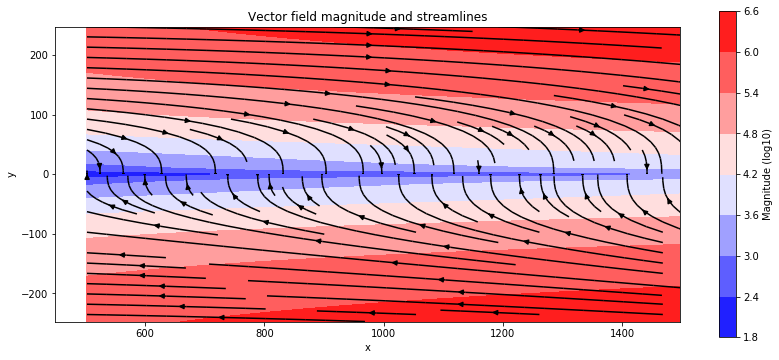

In [14]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, np.log10(magn), cmap="bwr")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude (log10)')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field magnitude and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### theoretical divergence

Since the vector field formula is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

the theoretical divergence transfer function is:

In [15]:
def z_func_div(x, y):
    
    return 0.0001 * y**3 - 0.0002 * x**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [16]:
theor_div = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_div)

In [17]:
print(theor_div)

[[ 1465.5909375  1464.5809375  1463.5609375 ...  1073.5609375
   1070.5809375  1067.5909375]
 [ 1375.5503125  1374.5403125  1373.5203125 ...   983.5203125
    980.5403125   977.5503125]
 [ 1289.1471875  1288.1371875  1287.1171875 ...   897.1171875
    894.1371875   891.1471875]
 ...
 [-1390.1496875 -1391.1596875 -1392.1796875 ... -1782.1796875
  -1785.1596875 -1788.1496875]
 [-1476.5528125 -1477.5628125 -1478.5828125 ... -1868.5828125
  -1871.5628125 -1874.5528125]
 [-1566.5934375 -1567.6034375 -1568.6234375 ... -1958.6234375
  -1961.6034375 -1964.5934375]]


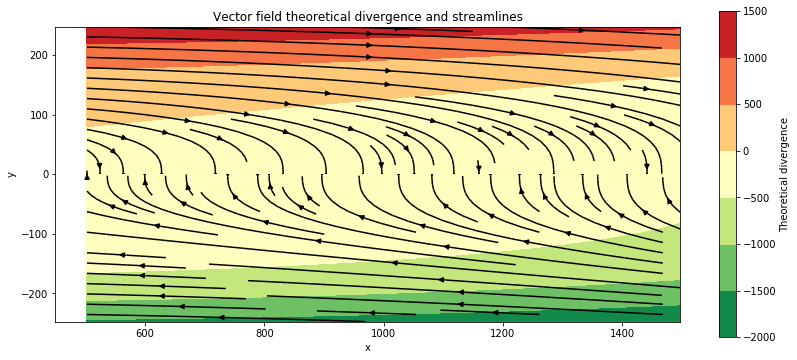

In [18]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, theor_div, cmap="RdYlGn_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Theoretical divergence')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field theoretical divergence and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### pygsf-estimated divergence

Divergence as resulting from pygsf calculation:

In [19]:
div = divergence(
    fld_x=fx1, 
    fld_y=fy1, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [20]:
print(div)

[[ 1465.5909375  1464.5809375  1463.5609375 ...  1073.5609375
   1070.5809375  1067.5909375]
 [ 1375.5503125  1374.5403125  1373.5203125 ...   983.5203125
    980.5403125   977.5503125]
 [ 1289.1471875  1288.1371875  1287.1171875 ...   897.1171875
    894.1371875   891.1471875]
 ...
 [-1390.1496875 -1391.1596875 -1392.1796875 ... -1782.1796875
  -1785.1596875 -1788.1496875]
 [-1476.5528125 -1477.5628125 -1478.5828125 ... -1868.5828125
  -1871.5628125 -1874.5528125]
 [-1566.5934375 -1567.6034375 -1568.6234375 ... -1958.6234375
  -1961.6034375 -1964.5934375]]


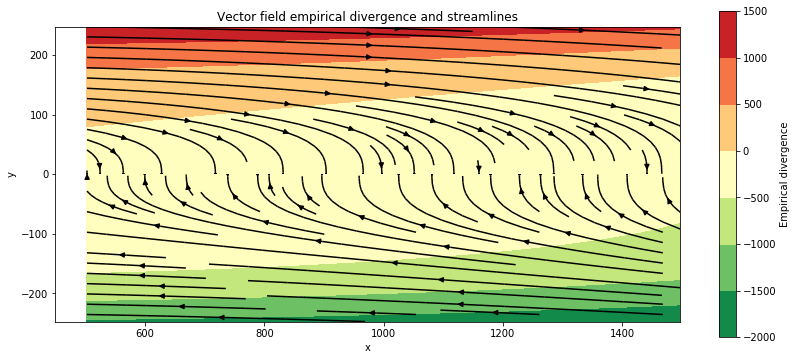

In [21]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, div, cmap="RdYlGn_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Empirical divergence')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field empirical divergence and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We check whether the theoretical and the estimated divergence fields are close:

In [22]:
np.allclose(theor_div, div)

True

### theoretical curl module

The vector function is:

\begin{equation*}
 \vec{\mathbf{v}} = 0.0001 x y^3  \vec{\mathbf{i}} - 0.0002  x^2 y  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}

therefore the theoretical curl module is:

\begin{equation*}
 curl = - 0.0004 x y - 0.0003 x y^2
\end{equation*}

so that the theoretical transfer function is:

In [23]:
def z_func_curl_mod(x, y):
    
    return - 0.0004 * x * y - 0.0003 * x * y**2

The theoretical divergence field can be created using the function expressing the analytical derivatives *z_func_div*:

In [24]:
theor_curl_mod = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_curl_mod)

In [25]:
print(theor_curl_mod)

[[ -9284.1271875  -9376.5065625  -9468.8859375 ... -27482.8640625
  -27575.2434375 -27667.6228125]
 [ -8913.7846875  -9002.4790625  -9091.1734375 ... -26386.5765625
  -26475.2709375 -26563.9653125]
 [ -8550.9796875  -8636.0640625  -8721.1484375 ... -25312.6015625
  -25397.6859375 -25482.7703125]
 ...
 [ -8455.5046875  -8539.6390625  -8623.7734375 ... -25029.9765625
  -25114.1109375 -25198.2453125]
 [ -8816.2996875  -8904.0240625  -8991.7484375 ... -26098.0015625
  -26185.7259375 -26273.4503125]
 [ -9184.6321875  -9276.0215625  -9367.4109375 ... -27188.3390625
  -27279.7284375 -27371.1178125]]


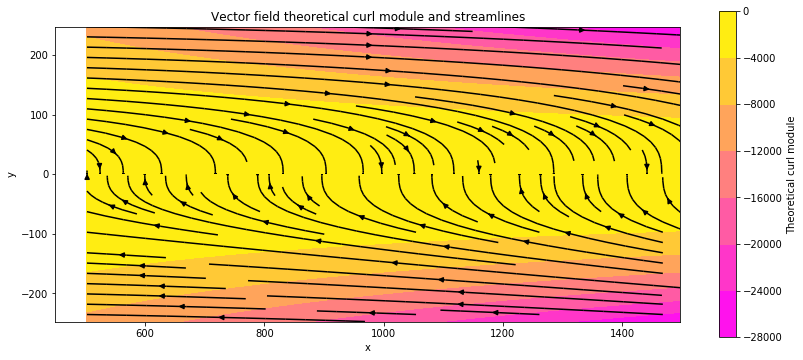

In [26]:
plt.figure(figsize=(14, 6))

plt.contourf(X, Y, theor_curl_mod, cmap="spring")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Theoretical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field theoretical curl module and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### pygsf-estimated curl value

The module of curl as resulting from pygsf calculation is:

In [27]:
curl_mod = curl_module(
    fld_x=fx1, 
    fld_y=fy1, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [28]:
print(curl_mod)

[[ -9281.8621875  -9373.9690625  -9466.3234375 ... -27475.4265625
  -27567.7809375 -27659.8878125]
 [ -8915.2834375  -9003.7478125  -9092.4546875 ... -26390.2953125
  -26479.0021875 -26567.4665625]
 [ -8552.4734375  -8637.3328125  -8722.4296875 ... -25316.3203125
  -25401.4171875 -25486.2765625]
 ...
 [ -8456.5234375  -8540.9078125  -8625.0546875 ... -25033.6953125
  -25117.8421875 -25202.2265625]
 [ -8817.3134375  -8905.2928125  -8993.0296875 ... -26101.7203125
  -26189.4571875 -26277.4365625]
 [ -9181.8721875  -9273.4840625  -9364.8484375 ... -27180.9015625
  -27272.2659375 -27363.8778125]]


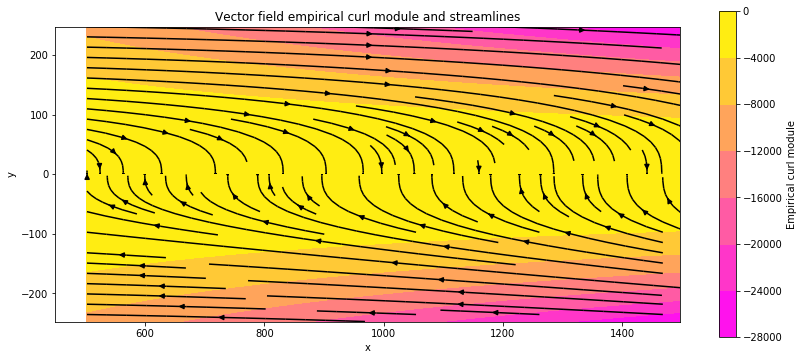

In [29]:
plt.figure(figsize=(14, 6))
plt.contourf(X, Y, theor_curl_mod, cmap="spring")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Empirical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Vector field empirical curl module and streamlines')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We check whether the theoretical and the estimated curl module fields are close:

In [30]:
np.allclose(theor_curl_mod, curl_mod)

False

We look at where there are significant differences between the theoretical and the empiric curl module fields, by calculating the percent difference between these two fields:

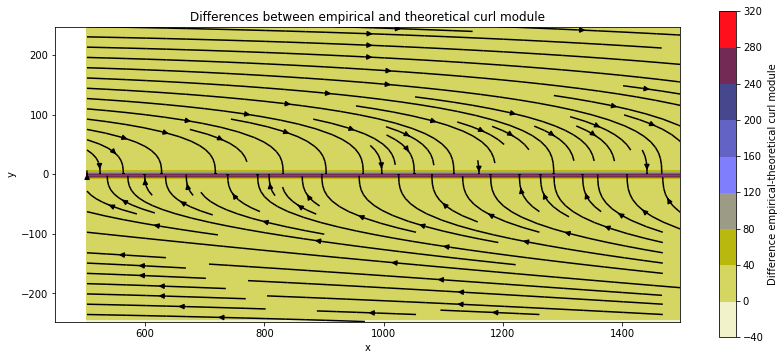

In [31]:
percent_diffs = 100.0*(curl_mod - theor_curl_mod)/theor_curl_mod

plt.figure(figsize=(14, 6))

plt.contourf(X, Y, percent_diffs, cmap="gist_stern_r")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Difference empirical-theoretical curl module')
plt.streamplot(X, Y, fx1/magn, fy1/magn, color="black")
plt.axis("image")
plt.title('Differences between empirical and theoretical curl module')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

While the majority of the empiric values are near the theoretical ones, there is an almost horizontal strip at around y = 0 where flows have singularities, with very high deviances (both negative and positive) that are related to the observed "singularity" of the v_x field gradient along the y axis.

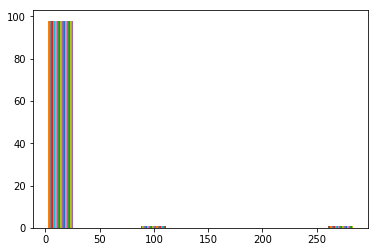

In [32]:
plt.hist(percent_diffs)  # arguments are passed to np.histogram
plt.show()

## Vector field parameters: example 2

We test another theoretical, 2D vector field, maintaining the same geotransform and other grid parameters as in the previous example. We use the field described in example 1 in [4]:

\begin{equation*}
 \vec{\mathbf{v}} = y  \vec{\mathbf{i}} - x  \vec{\mathbf{j}} + 0  \vec{\mathbf{k}}
\end{equation*}



The "transfer" functions from coordinates to z values are: 

In [33]:
def z_func_fx(x, y):

    return y

def z_func_fy(x, y):

    return - x

### geotransform and grid definitions

Gridded field values are calculated for the theoretical source vector field x- and y- components using the provided number of rows and columns for the grid:

In [34]:
rows=200; cols=200

In [35]:
size_x = 10; size_y = 10

In [36]:
tlx = -1000.0; tly = 1000.0 

Arrays components are defined in terms of indices *i* and *j*, so to transform array indices to geographical coordinates we use a geotransform. The one chosen is:

In [37]:
gt1 = GeoTransform(
    inTopLeftX=tlx, 
    inTopLeftY=tly, 
    inPixWidth=size_x, 
    inPixHeight=size_y)

Note that the chosen geotransform has no axis rotation, as is in the most part of cases with geographic grids.

### vector field x-component

In [38]:
fx2 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fx)

In [39]:
print(fx2)

[[ 995.  995.  995. ...  995.  995.  995.]
 [ 985.  985.  985. ...  985.  985.  985.]
 [ 975.  975.  975. ...  975.  975.  975.]
 ...
 [-975. -975. -975. ... -975. -975. -975.]
 [-985. -985. -985. ... -985. -985. -985.]
 [-995. -995. -995. ... -995. -995. -995.]]


### vector field y-component

In [40]:
fy2 = array_from_function(
    row_num=rows, 
    col_num=cols, 
    geotransform=gt1, 
    z_transfer_func=z_func_fy)

In [41]:
print(fy2)

[[ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 ...
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]
 [ 995.  985.  975. ... -975. -985. -995.]]


### flow visualization

We visualize the parameters of the flow.

The geographic coordinates are:

In [42]:
X, Y = gtToxyCellCenters(
    gt=gt1,
    num_rows=rows,
    num_cols=cols)

The vector field magnitude is:

In [43]:
magn = magnitude(
    fld_x=fx2, 
    fld_y=fy2)

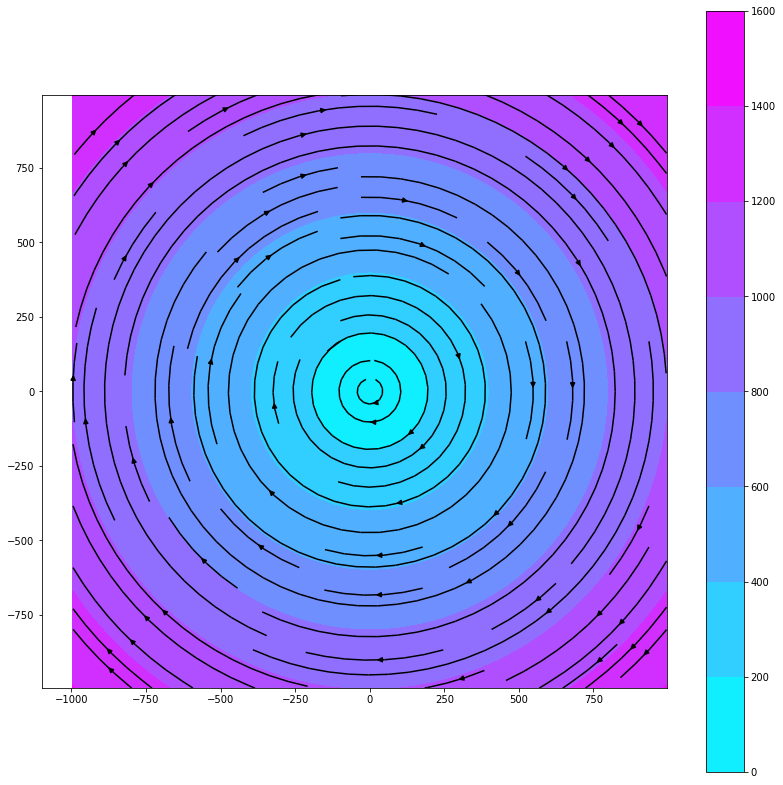

In [44]:
plt.figure(figsize=(14, 14))

plt.contourf(X, Y, magn, cmap="cool")
plt.colorbar()
plt.streamplot(X, Y, fx2/magn, fy2/magn, color="black")
plt.axis("image")

plt.show()

### theoretical curl module

The theoretical curl module is a constant value:

\begin{equation*}
 curl = -2
\end{equation*}

### pygsf-estimated module of curl

The module of curl as resulting from pygsf calculation is:

In [45]:
curl_mod = curl_module(
    fld_x=fx2, 
    fld_y=fy2, 
    cell_size_x=size_x, 
    cell_size_y=size_y)

In [46]:
print(curl_mod)

[[-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 ...
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]
 [-2. -2. -2. ... -2. -2. -2.]]


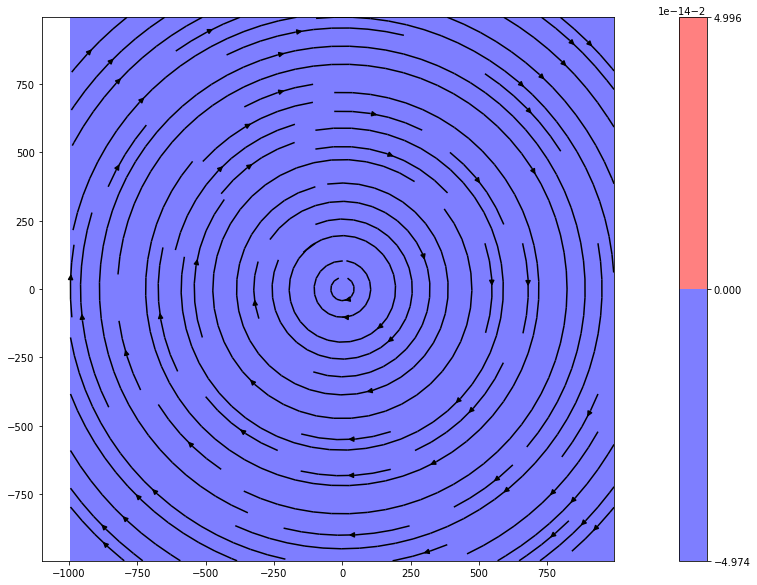

In [47]:
plt.figure(figsize=(14, 10))

plt.contourf(X, Y, curl_mod, cmap="bwr")
plt.colorbar()
plt.streamplot(X, Y, fx2/magn, fy2/magn, color="black")
plt.axis("image")

plt.show()

We check whether the theoretical and the estimated curl module fields are close:

In [48]:
np.allclose(-2.0, curl_mod)

True

Deviances from the expected value are reduced, as evidenced by the histogram:

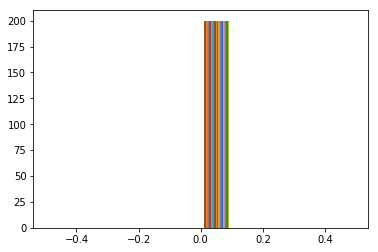

In [49]:
plt.hist(curl_mod + 2.0)  # arguments are passed to np.histogram
plt.show()

### References

[1] Visually appealing ways to plot singular vector fields with matplotlib or other foss tools. https://scicomp.stackexchange.com/questions/18760/visually-appealing-ways-to-plot-singular-vector-fields-with-matplotlib-or-other

[2] Curl Function (Solution). http://www.johnny-lin.com/ams2011/sc/arrays_io/as/hide/py-curl-soln.shtml. Consulted on June 4, 2018.


[3] M. R. Spiegel, 1975. Analisi Vettoriale. Etas Libri, pp. 224.


[4] Curl (mathematics). https://en.wikipedia.org/wiki/Curl_(mathematics). Consulted on June 6, 2018.